In [1]:
# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Se importa base de plan de ventas fusión Agro - Proceso

Plan2022 = pd.read_csv("1.csv")

Precios = pd.read_csv("2.csv")

Costos = pd.read_csv("4.csv")

Plan2022_ = pd.read_csv("5.csv")

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Mesatrimestre = pd.read_csv("Mesatrimestre.csv")

# A qué categorías pertenece cada producto


Producto_ = Producto.groupby(['Administracion de la categoria','H1 o H2 o Resto','Producto_Ranking']).agg({'Producto_': 'count'})

# A qué zonas pertenece cada cliente


Zona_ = Zona.groupby(['Empresa','Zona','RM/ REIQ']).agg({'RM/ REIQ': 'count'})


# A qué zonas pertenece cada cliente


Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]

Cultivo_ = Cultivos.groupby(['Cultivo_Macrocategoría','Cultivo_Categoría','Cultivo_']).agg({'Cultivo_': 'count'})


# Se incluyen las categorías en la base


Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_ = Ventas_zona_producto.merge(Mesatrimestre, how='left', left_on='Mes', right_on='Mes')

Ventas_zona_producto_cultivo_ = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)






In [2]:
#Criterios para filtrar datos
Periodoconsiderado_2022 = Ventas_zona_producto_cultivo_['Periodo'] == 2022
Periodoconsiderado2021 = Ventas_zona_producto_cultivo_['Periodo'] == 2021
Periodoconsiderado2020 = Ventas_zona_producto_cultivo_['Periodo'] == 2020
Zonaconsiderada_Noroeste = Ventas_zona_producto_cultivo_['Zona Ranking_'] == "01 Noroeste"
ZonaconsideradaZona2 = Ventas_zona_producto_cultivo_['Zona Ranking_'] == "03 Zona 2"
ZonaconsideradaPacífico = Ventas_zona_producto_cultivo_['Zona Ranking_'] == "02 Pacífico"
EmpresaconsideradaMéxico = Ventas_zona_producto_cultivo_ ['Empresa'] == "México"
EmpresaconsideradaNOesMéxico = Ventas_zona_producto_cultivo_ ['Empresa'] != "México"

Trimestres = ['T1','T2','T3','T4']
Trimestres_ = Ventas_zona_producto_cultivo_['Trimestre'].isin(Trimestres)
T1_ = Ventas_zona_producto_cultivo_['Trimestre'] == "T1"
T1yT2 = ['T1', 'T2']
T1aT4 = ['T1', 'T2','T3', 'T4']
Catdecultivo = Ventas_zona_producto_cultivo_['Cultivo_Categoría'] == "Hortalizas"
AdmCat_Cito = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "1 Cito"
AdmCat_Suelo = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "2 Raiz/ suelo"
AdmCat_Bioest = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "3 Bioestimulante"
AdmCat_Coady = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "4 Coadyuvante"
H2 = Ventas_zona_producto_cultivo_['H1 o H2 o Resto'] == "H2"



In [3]:
# Plan 2022 corresponde al año 2022, también es posible seleccionar 2020 o 2021

Ventas_zona_producto_cultivo = Ventas_zona_producto_cultivo_[H2]

Ventas_zona_producto_cultivo_2021 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado2021 &
    H2 &
    Trimestres_]

Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    H2&
    Trimestres_]
Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022  &
    AdmCat_Cito &
    H2&
    Trimestres_]
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    AdmCat_Suelo &
    H2&
    Trimestres_]
Ventas_zona_producto_cultivo_Bioest_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    AdmCat_Bioest &
    H2&
    Trimestres_]
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    AdmCat_Coady &
    H2&
    Trimestres_]

CitoMx = Ventas_zona_producto_cultivo_[Periodoconsiderado_2022 & 
                                      EmpresaconsideradaMéxico &
                                      AdmCat_Cito  &
    H2&
    Trimestres_]
CitoIntnl = Ventas_zona_producto_cultivo_[Periodoconsiderado_2022 &
                                         EmpresaconsideradaNOesMéxico &
                                         AdmCat_Cito 
                                       &
    H2&
    Trimestres_]
SueloMx = Ventas_zona_producto_cultivo_[Periodoconsiderado_2022 &
                                       EmpresaconsideradaMéxico &
                                       AdmCat_Suelo 
                                       &
    H2&
    Trimestres_]
SueloIntnl = Ventas_zona_producto_cultivo_[Periodoconsiderado_2022 &
                                          EmpresaconsideradaNOesMéxico &
                                          AdmCat_Suelo 
                                       &
    H2&
    Trimestres_]
BioestMx = Ventas_zona_producto_cultivo_[Periodoconsiderado_2022 &
                                        EmpresaconsideradaMéxico &
                                        AdmCat_Bioest 
                                       &
    H2&
    Trimestres_]
BioestIntnl = Ventas_zona_producto_cultivo_[Periodoconsiderado_2022 &
                                           EmpresaconsideradaNOesMéxico &
                                           AdmCat_Bioest 
                                       &
    H2&
    Trimestres_]

# Análisis  H2 

# Utilidad Fusión Agro por zona y por año 

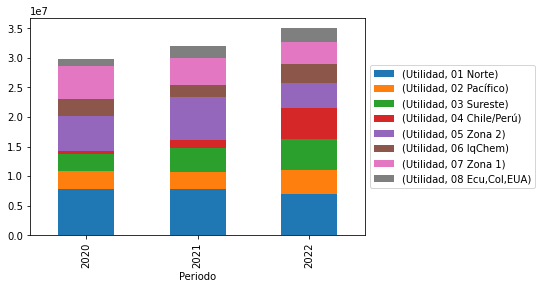

In [4]:
UZA = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
UZA_ = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad': 'sum'})
UZA_df = pd.DataFrame(UZA_.unstack(level = 1))
UZA_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [5]:
UZA2 = Ventas_zona_producto_cultivo.groupby(['Periodo']).agg({'Utilidad': 'sum'})
UZA2.head(20)

,Utilidad
Periodo,
2020,2.983104e+07
2021,3.191855e+07
2022,3.500884e+07


# Utilidad Fusión Agro 

In [6]:
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

$35.009 M


# Crecimiento respecto al 2021

In [7]:
print ('{:,.2f} %'.format(
                            ((Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/
                            Ventas_zona_producto_cultivo_2021['Utilidad'].sum())-1)*100
                        )) 

9.68 %


 # Desglose por zona y por categoría

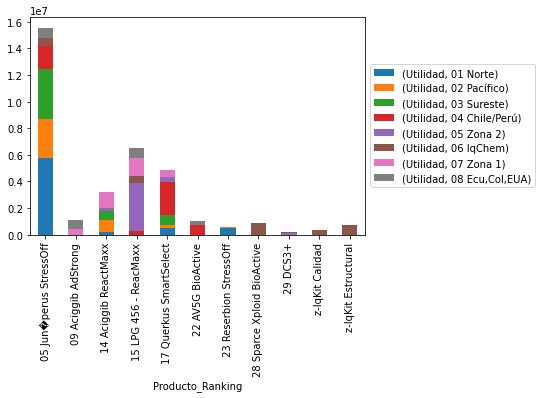

In [8]:
RCZ = Ventas_zona_producto_cultivo_2022.groupby(['Producto_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
RCZ_ = Ventas_zona_producto_cultivo_2022.groupby(['Producto_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
RCZ_df = pd.DataFrame(RCZ_.unstack(level = 1))
RCZ_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [9]:
RCZ2 = Ventas_zona_producto_cultivo_2022.groupby(['Producto_Ranking']).agg({'Utilidad': 'sum'})
RCZ2.head(20)

,Utilidad
Producto_Ranking,
05 Jun�perus StressOff,1.556617e+07
09 Aciggib AdStrong,1.083211e+06
14 Aciggib ReactMaxx,3.183653e+06
15 LPG 456 - ReacMaxx,6.511189e+06
17 Querkus SmartSelect,4.879402e+06
22 AV5G BioActive,1.029301e+06
23 Reserbion StressOff,5.584621e+05
28 Sparce Xploid BioActive,8.589562e+05
29 DCS3+,2.050920e+05


# Top 20 prioridades en todo Fusión Agro

In [10]:
Detalle2022 = Ventas_zona_producto_cultivo_2022.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking','Producto_Ranking']).agg({'Utilidad': 'sum'})
Detalle2022_sorted = Detalle2022.sort_values(by=['Utilidad'],ascending=False)
Detalle2022_sorted.head(20)

Utilidad
Cultivo_Categoría_Ranking  Zona_Ranking   Producto_Ranking                    
06 Granos                  05 Zona 2      15 LPG 456 - ReacMaxx   3.039594e+06
02 Frutales siempre verdes 03 Sureste     05 Jun�perus StressOff  2.057203e+06
09 Cucurbitácea            01 Norte       05 Jun�perus StressOff  1.781742e+06
04 Vides                   01 Norte       05 Jun�perus StressOff  1.648559e+06
03 Hortalizas              01 Norte       05 Jun�perus StressOff  1.431277e+06
04 Vides                   04 Chile/Perú  17 Querkus SmartSelect  1.287379e+06
03 Hortalizas              02 Pacífico    05 Jun�perus StressOff  1.020789e+06
                           07 Zona 1      14 Aciggib ReactMaxx    8.848063e+05
10 Frutal caducifolio      04 Chile/Perú  17 Querkus SmartSelect  8.582524e+05
05 Berries                 02 Pacífico    14 Aciggib ReactMaxx    8.221995e+05
03 Hortalizas              03 Sureste     05 Jun�perus StressOff  8.219658e+05
08 Industriales            02 Pacífico    05 Jun�perus StressOff  7.970362e+05
03 Hortalizas              04 Chile/Perú  05 Jun�perus StressOff  7.042793e+05
02 Frutales siempre verdes 08 Ecu,Col,EUA 09 Aciggib AdStrong     6.169310e+05
                           02 Pacífico    05 Jun�perus StressOff  6.139306e+05
04 Vides                   04 Chile/Perú  22 AV5G BioActive       6.108529e+05
08 Industriales            03 Sureste     05 Jun�perus StressOff  4.992108e+05
06 Granos                  06 IqChem      z-IqKit Estructural     4.693500e+05
10 Frutal caducifolio      01 Norte       05 Jun�perus StressOff  4.627533e+05
02 Frutales siempre verdes 07 Zona 1      09 Aciggib AdStrong     4.505285e+05

In [11]:
print ('${:,.3f} M'.format(Detalle2022_sorted['Utilidad'].head(20).sum()/1000000) )


$20.879 M


# Análisis por categoría

# Cito, 2022

# Valor de Cito y lo que representa respecto a utilidad total

In [12]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcito2022 = Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()
utilidadcito2022/ utilidadtotal2022
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcito2022*100/ utilidadtotal2022))


$6.885 M
19.7 %


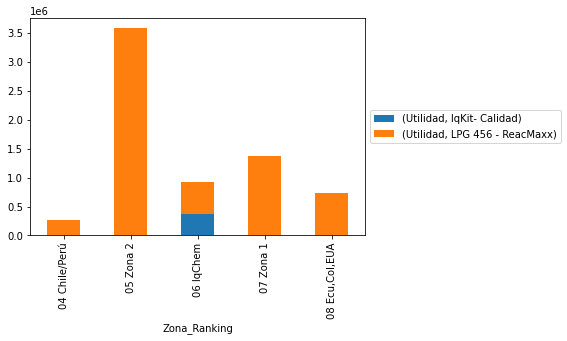

In [13]:
ResumenporHorizonteyEmp = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_df = pd.DataFrame(ResumenporHorizonteyEmp_.unstack(level = 1))
ResumenporHorizonteyEmp_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [14]:
Ventas_zona_Cito_2022 = ResumenporHorizonteyEmp.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Cito_2022_sorted = Ventas_zona_Cito_2022.sort_values(by=['Utilidad'],ascending=False)
Ventas_zona_Cito_2022_sorted.head(20)

,Utilidad
Zona_Ranking,
05 Zona 2,3.584948e+06
07 Zona 1,1.375736e+06
06 IqChem,9.226269e+05
"08 Ecu,Col,EUA",7.298073e+05
04 Chile/Perú,2.714806e+05


# Top 10

In [15]:
DetalleCito2022 = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleCito2022_sorted = DetalleCito2022.sort_values(by=['Utilidad'],ascending=False)
DetalleCito2022_sorted.head(10)


Utilidad
Cultivo_Categoría       Zona_Ranking                
Granos                  05 Zona 2       3.039594e+06
Industriales            07 Zona 1       4.199006e+05
Forraje                 05 Zona 2       3.787184e+05
Industriales            06 IqChem       3.647288e+05
Frutales siempre verdes 08 Ecu,Col,EUA  3.601119e+05
                        07 Zona 1       2.861040e+05
Granos                  07 Zona 1       2.556425e+05
                        08 Ecu,Col,EUA  2.151345e+05
                        06 IqChem       1.709360e+05
Hortalizas              04 Chile/Perú   1.551318e+05

In [16]:
print('${:,.3f} M'.format(DetalleCito2022_sorted['Utilidad'].head(10).sum()/1000000))

$5.646 M


# Raíz/ Suelo, 2022

# Valor de RaízSuelo y lo que representa respecto a utilidad total

In [17]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadsuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadsuelo2022*100/ utilidadtotal2022))


$4.879 M
13.9 %


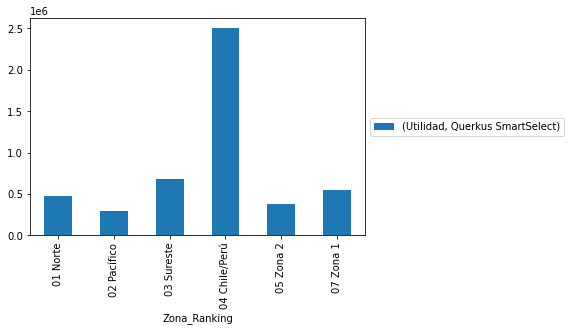

In [18]:
ResumenporHorizonteyEmp_Suelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Suelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Suelo_df = pd.DataFrame(ResumenporHorizonteyEmp_Suelo_.unstack(level = 1))
ResumenporHorizonteyEmp_Suelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [19]:
Ventas_zona_Suelo_2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Suelo_2022.head(20)

,Utilidad
Zona_Ranking,
01 Norte,4.689326e+05
02 Pacífico,2.912724e+05
03 Sureste,6.844091e+05
04 Chile/Perú,2.503007e+06
05 Zona 2,3.791706e+05
07 Zona 1,5.526106e+05


# Top 10 

In [20]:
DetalleSuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleSuelo2022_sorted = DetalleSuelo2022.sort_values(by=['Utilidad'],ascending=False)
DetalleSuelo2022_sorted.head(10)

Utilidad
Cultivo_Categoría       Zona_Ranking               
Vides                   04 Chile/Perú  1.287379e+06
Frutal caducifolio      04 Chile/Perú  8.582524e+05
Hortalizas              03 Sureste     3.684176e+05
Frutales siempre verdes 04 Chile/Perú  3.573762e+05
Hortalizas              01 Norte       3.344356e+05
Frutales siempre verdes 07 Zona 1      3.210719e+05
                        03 Sureste     2.468655e+05
                        05 Zona 2      2.079323e+05
Berries                 02 Pacífico    1.999075e+05
Hortalizas              07 Zona 1      1.161974e+05

In [21]:
print('${:,.3f} M'.format(DetalleSuelo2022_sorted['Utilidad'].head(10).sum()/1000000))

$4.298 M


# Bioestimulante, 2022

# Valor de Bioestimulante y lo que representa respecto a utilidad total

In [22]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadbioest2022 = Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadbioest2022*100/ utilidadtotal2022))


$18.978 M
54.2 %


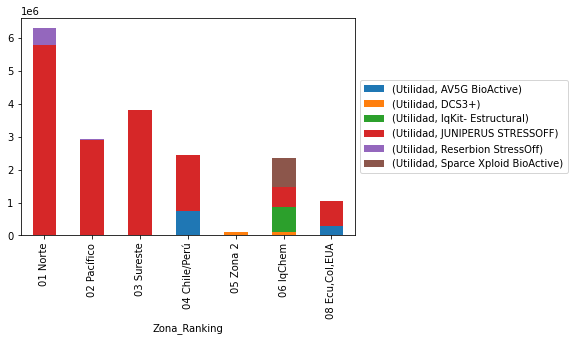

In [23]:
ResumenporHorizonteyEmp_Bioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Bioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Bioest_df = pd.DataFrame(ResumenporHorizonteyEmp_Bioest_.unstack(level = 1))
ResumenporHorizonteyEmp_Bioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [24]:
Ventas_zona_Bioest_2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Bioest_2022.head(20)

,Utilidad
Zona_Ranking,
01 Norte,6.297107e+06
02 Pacífico,2.930925e+06
03 Sureste,3.804096e+06
04 Chile/Perú,2.435891e+06
05 Zona 2,1.145045e+05
06 IqChem,2.344555e+06
"08 Ecu,Col,EUA",1.050896e+06


# Top 10 

In [25]:
DetalleBioest2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleBioest2022_sorted = DetalleBioest2022.sort_values(by=['Utilidad'],ascending=False)
DetalleBioest2022_sorted.head(10)

Utilidad
Cultivo_Categoría       Zona_Ranking               
Frutales siempre verdes 03 Sureste     2.057203e+06
Vides                   01 Norte       1.985606e+06
Cucurbitácea            01 Norte       1.781742e+06
Hortalizas              01 Norte       1.431277e+06
                        02 Pacífico    1.020789e+06
Vides                   04 Chile/Perú  9.126869e+05
Granos                  06 IqChem      8.438353e+05
Hortalizas              03 Sureste     8.219658e+05
Industriales            02 Pacífico    7.970362e+05
Hortalizas              06 IqChem      7.846444e+05

In [26]:
print('${:,.3f} M'.format(DetalleBioest2022_sorted['Utilidad'].head(10).sum()/1000000))

$12.437 M


# Análisis Mx vs "Internacional"

# Raíz/Suelo en México, 2022

In [27]:
print ('${:,.3f} M'.format(SueloMx['Utilidad'].sum()/1000000) )

$1.445 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

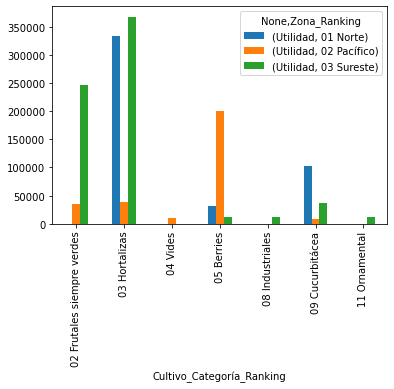

In [28]:
ResumenporCultyZona_SueloMx = SueloMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx_df = pd.DataFrame(ResumenporCultyZona_SueloMx.unstack(level = 1))
ResumenporCultyZona_SueloMx_df.plot(kind = 'bar')

In [29]:
ResumenporCultyZona_SueloMx2 = SueloMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,281572.292693
03 Hortalizas,742133.490554
04 Vides,9478.823454
05 Berries,243058.015681
08 Industriales,10967.429318
09 Cucurbitácea,146321.618042
11 Ornamental,11082.429319


# Raíz/Suelo en demás empresas


In [30]:
print ('${:,.3f} M'.format(SueloIntnl['Utilidad'].sum()/1000000) )

$3.435 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

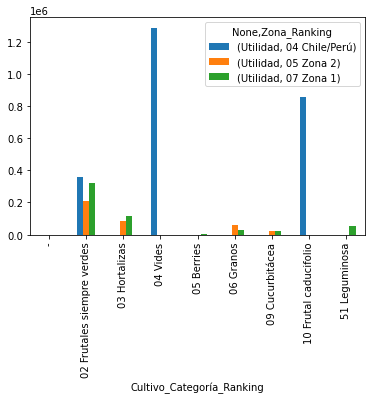

In [31]:
ResumenporCultyZona_SueloIntnl = SueloIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl_df = pd.DataFrame(ResumenporCultyZona_SueloIntnl.unstack(level = 1))
ResumenporCultyZona_SueloIntnl_df.plot(kind = 'bar')

In [32]:
ResumenporCultyZona_SueloIntnl2 = SueloIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
-,3.669393e+02
02 Frutales siempre verdes,8.863803e+05
03 Hortalizas,2.018166e+05
04 Vides,1.287379e+06
05 Berries,6.115655e+03
06 Granos,9.173482e+04
09 Cucurbitácea,4.770211e+04
10 Frutal caducifolio,8.582524e+05
51 Leguminosa,5.504089e+04


# Top 10 en México

In [33]:
ResumenporCultyZona_SueloMx_detalle = SueloMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl_detalle = SueloIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx_detalle_sorted = ResumenporCultyZona_SueloMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_SueloMx_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x                
Hortalizas              Fv           294764.781780
Frutales siempre verdes Fv           206335.347240
Hortalizas              Quinval      175521.347266
Berries                 AACSA        100264.054091
                        JF            99643.434550
Cucurbitácea            FormaQ        77239.434541
Hortalizas              Dysea         71376.195456
                        FormaQ        55354.928091
                        Serco Verde   40530.157500
Frutales siempre verdes Serco Verde   40530.157500

In [34]:
print ('${:,.3f} M'.format(ResumenporCultyZona_SueloMx_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$1.162 M


# Top 10 en otros países

In [35]:
ResumenporCultyZona_SueloIntnl_detalle_sorted = ResumenporCultyZona_SueloIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_SueloIntnl_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x                    
Vides                   Agrofuturo       858252.391000
Frutal caducifolio      Tattersal        858252.390900
Vides                   Tattersal        429126.195400
Frutales siempre verdes Bioscience       357376.195420
                        Empresas Melo    122313.097720
                        Guatemala        100908.305628
                        Honduras          97850.478182
Hortalizas              Agroasa           85619.168412
Frutales siempre verdes Nicaragua         73387.858640
                        Agricola Piscis   73387.858640

In [36]:
print ('${:,.3f} M'.format(ResumenporCultyZona_SueloIntnl_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$3.056 M


# Bioestimulante en México, 2022

In [37]:
print ('${:,.3f} M'.format(BioestMx['Utilidad'].sum()/1000000) )

$13.032 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

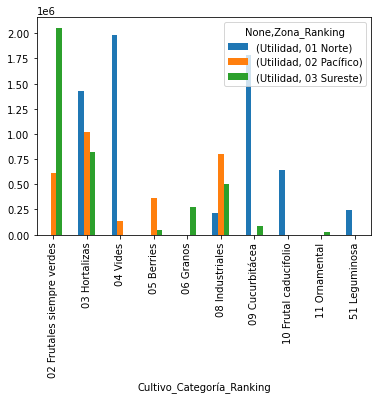

In [38]:
ResumenporCultyZona_BioestMx = BioestMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx_df = pd.DataFrame(ResumenporCultyZona_BioestMx.unstack(level = 1))
ResumenporCultyZona_BioestMx_df.plot(kind = 'bar')

In [39]:
ResumenporCultyZona_BioestMx2 = BioestMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,2.671134e+06
03 Hortalizas,3.274032e+06
04 Vides,2.124406e+06
05 Berries,4.071820e+05
06 Granos,2.717203e+05
08 Industriales,1.507010e+06
09 Cucurbitácea,1.863179e+06
10 Frutal caducifolio,6.452521e+05
11 Ornamental,2.574475e+04


# Bioestimulante en demás empresas


In [40]:
print ('${:,.3f} M'.format(BioestIntnl['Utilidad'].sum()/1000000) )

$5.946 M


<AxesSubplot:xlabel='Cultivo_Categoría_Ranking'>

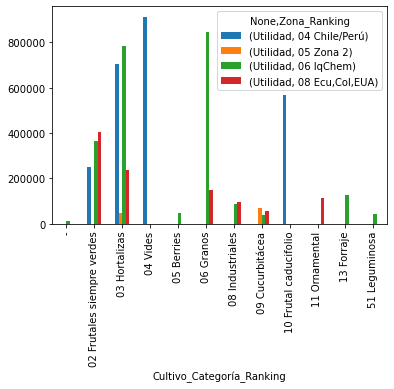

In [41]:
ResumenporCultyZona_BioestIntnl = BioestIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_Bioest_df = pd.DataFrame(ResumenporCultyZona_BioestIntnl.unstack(level = 1))
ResumenporCultyZona_Bioest_df.plot(kind = 'bar')

In [42]:
ResumenporCultyZona_BioestIntnl2 = BioestIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestIntnl2.head(20)

,Utilidad
Cultivo_Categoría_Ranking,
-,1.207833e+04
02 Frutales siempre verdes,1.019469e+06
03 Hortalizas,1.770096e+06
04 Vides,9.126869e+05
05 Berries,4.471700e+04
06 Granos,9.919052e+05
08 Industriales,1.841074e+05
09 Cucurbitácea,1.602260e+05
10 Frutal caducifolio,5.673964e+05


# Top 10 en México

In [43]:
ResumenporCultyZona_BioestMx_detalle = BioestMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestIntnl_detalle = BioestIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx_detalle_sorted = ResumenporCultyZona_BioestMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_BioestMx_detalle_sorted.head(10)

Utilidad
Cultivo_Categoría       RM/ REIQ_x               
Vides                   Ditecosa     1.985606e+06
Frutales siempre verdes Fv           1.600836e+06
Cucurbitácea            Ditecosa     1.133746e+06
Hortalizas              Ciba         8.639966e+05
                        Quinval      6.178981e+05
Industriales            Ciba         5.618475e+05
Cucurbitácea            FormaQ       5.339224e+05
Hortalizas              Fv           4.925650e+05
Frutal caducifolio      Ditecosa     4.627533e+05
Frutales siempre verdes Serco Verde  3.981567e+05

In [44]:
print ('${:,.3f} M'.format(ResumenporCultyZona_BioestMx_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$8.651 M


# Top 10 en otros países

In [45]:
ResumenporCultyZona_BioestIntnl_detalle_sorted = ResumenporCultyZona_BioestIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_BioestIntnl_detalle_sorted.head(10)

,,Utilidad
Cultivo_Categoría,RM/ REIQ_x,
Vides,Agrofuturo,772888.657700
Hortalizas,Bioscience,503056.665140
Frutal caducifolio,Agrofuturo,326986.832400
Granos,Active Zoo,304500.000000
Frutales siempre verdes,Tekquimik,299615.461662
Hortalizas,IA- JPM,293765.003507
Frutales siempre verdes,Agrofuturo,251528.332600
Frutal caducifolio,Tattersal,240409.552600
Hortalizas,Agrica,235600.499330


In [46]:
print ('${:,.3f} M'.format(ResumenporCultyZona_BioestIntnl_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


$3.459 M
